In [1]:
%pip install pyreadstat --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_spss('CCAM SPSS Data 2008-2022.sav')

In [3]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [4]:
# specify category order for variables I'm plotting

df["happening"] = df["happening"].cat.set_categories(['Refused',
                                                      'No',
                                                      'Don\'t know',
                                                      'Yes'], ordered=True)

df["worry"] = df["worry"].cat.set_categories(['Refused',
                                              'Not at all worried',
                                              'Not very worried',
                                              'Somewhat worried',
                                              'Very worried'], ordered=True)

df["educ_category"] = df["educ_category"].cat.set_categories(['Less than high school',
                                                              'High school', 'Some college',
                                                              'Bachelor\'s degree or higher'],ordered=True)

df["income_category"] = df["income_category"].cat.set_categories(['Less than $50,000',
                                                                  '$50,000 to $99,999',
                                                                  '$100,000 or more'], ordered=True)

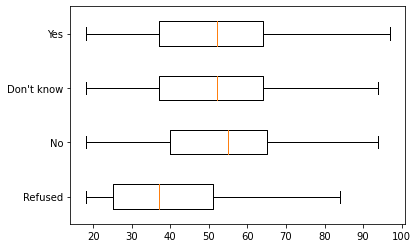

In [5]:
# age vs. ___

versus_var = "happening"

ages_by_category = []

category_values = df[versus_var].cat.categories

for response in category_values:
    ages_by_category.append(df[df[versus_var] == response]["age"])
    
plt.boxplot(ages_by_category, vert=False)
plt.yticks(ticks=[i+1 for i in range(len(category_values))], labels=category_values)
plt.show()

In [6]:
np.sum(df["weight_aggregate"])

28092.66713142408

In [7]:
# recompute weight_aggregate since theirs is incorrect
wave_counts = df["wave"].value_counts()
avg_wave_size = np.mean(wave_counts)

df["adam_weight_aggregate"] = df.apply(lambda row: (row.weight_wave / wave_counts[row.wave]) * avg_wave_size, axis=1)
df[["weight_aggregate", "adam_weight_aggregate"]]

,weight_aggregate,adam_weight_aggregate
0,0.269626,0.289234
1,0.424411,0.455275
2,0.244660,0.262453
3,0.144799,0.155329
4,0.644106,0.690947
...,...,...
30131,1.575959,1.690567
30132,0.886371,0.950830
30133,1.165305,1.250050
30134,0.687147,0.737118


In [8]:
# pd.pivot_table(df, values="weight_aggregate", columns=["wave"], aggfunc="sum")
# pd.pivot_table(df, values="adam_weight_aggregate", columns=["wave"], aggfunc="sum")

In [9]:
def plot_cat_crosstab(data, axis_var, color_var, xlab, ylab, title):
    crosstab = pd.crosstab(data[axis_var], data[color_var],
                           values=data["adam_weight_aggregate"], aggfunc="sum",
                           margins=False, normalize="index")

    ax = crosstab.plot(kind="barh", stacked=True)
    ax.invert_yaxis() # when reading top-to-bottom, it makes more sense for increasing quantities to be lower
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2))
    
#     # change formatting of the "All" label - use only with margins=True in the crosstab func
#     yticklabels = ax.get_yticklabels()
#     ax.get_yticklabels()[len(yticklabels)-1].set_size(20)

    return crosstab

worry,Refused,Not at all worried,Not very worried,Somewhat worried,Very worried
educ_category,,,,,
Less than high school,0.001261,0.101189,0.201398,0.442257,0.253895
High school,0.000643,0.071570,0.213424,0.465182,0.249181
Some college,0.000186,0.051777,0.156314,0.496870,0.294853
Bachelor's degree or higher,0.000000,0.019280,0.101590,0.476895,0.402235


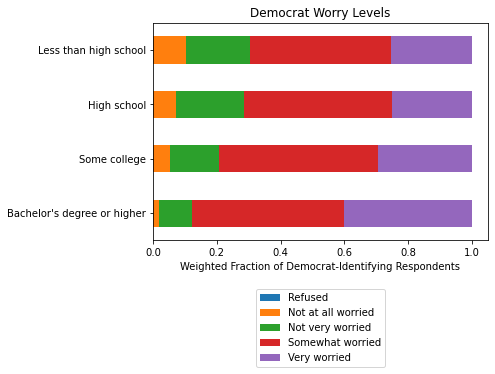

In [10]:
plot_cat_crosstab(df[df["party"] == "Democrat"],
                 "educ_category", "worry",
                 xlab="Weighted Fraction of Democrat-Identifying Respondents",
                 ylab="",
                 title="Democrat Worry Levels")

worry,Refused,Not at all worried,Not very worried,Somewhat worried,Very worried
educ_category,,,,,
Less than high school,0.000000,0.134756,0.254644,0.390407,0.220193
High school,0.001695,0.177338,0.280177,0.405302,0.135488
Some college,0.001173,0.160889,0.255202,0.417781,0.164954
Bachelor's degree or higher,0.000306,0.135812,0.228487,0.419397,0.215998


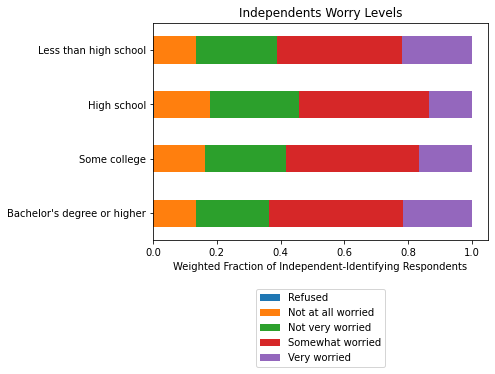

In [11]:
plot_cat_crosstab(df[df["party"] == "Independent"],
                 "educ_category", "worry",
                 xlab="Weighted Fraction of Independent-Identifying Respondents",
                 ylab="",
                 title="Independents Worry Levels")

worry,Refused,Not at all worried,Not very worried,Somewhat worried,Very worried
educ_category,,,,,
Less than high school,0.000000,0.244775,0.310650,0.325140,0.119434
High school,0.000356,0.301176,0.334141,0.289960,0.074368
Some college,0.000386,0.311900,0.354136,0.280354,0.053225
Bachelor's degree or higher,0.001346,0.282348,0.375229,0.293053,0.048024


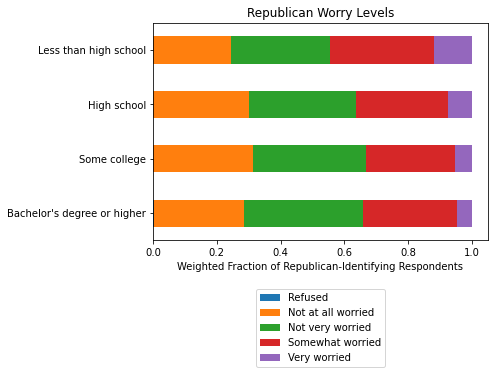

In [12]:
plot_cat_crosstab(df[df["party"] == "Republican"],
                 "educ_category", "worry",
                 xlab="Weighted Fraction of Republican-Identifying Respondents",
                 ylab="",
                 title="Republican Worry Levels")

happening,Refused,No,Don't know,Yes
educ_category,,,,
Less than high school,0.002857,0.061283,0.221749,0.714111
High school,0.002023,0.050880,0.164373,0.782723
Some college,0.000335,0.036127,0.088259,0.875278
Bachelor's degree or higher,0.000000,0.016585,0.039642,0.943773


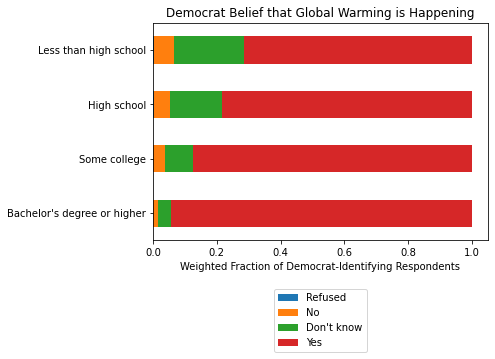

In [13]:
plot_cat_crosstab(df[df["party"] == "Democrat"],
                 "educ_category", "happening",
                 xlab="Weighted Fraction of Democrat-Identifying Respondents",
                 ylab="",
                 title="Democrat Belief that Global Warming is Happening")

happening,Refused,No,Don't know,Yes
educ_category,,,,
Less than high school,0.000000,0.159367,0.210274,0.630359
High school,0.001428,0.163552,0.189892,0.645129
Some college,0.000896,0.162165,0.141826,0.695113
Bachelor's degree or higher,0.000187,0.114516,0.127517,0.757779


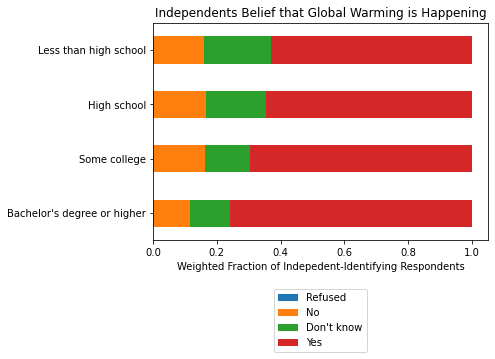

In [14]:
plot_cat_crosstab(df[df["party"] == "Independent"],
                 "educ_category", "happening",
                 xlab="Weighted Fraction of Indepedent-Identifying Respondents",
                 ylab="",
                 title="Independents Belief that Global Warming is Happening")

happening,Refused,No,Don't know,Yes
educ_category,,,,
Less than high school,0.000000,0.272574,0.238481,0.488945
High school,0.000463,0.304368,0.227292,0.467878
Some college,0.000465,0.328212,0.216181,0.455143
Bachelor's degree or higher,0.000087,0.292671,0.174845,0.532397


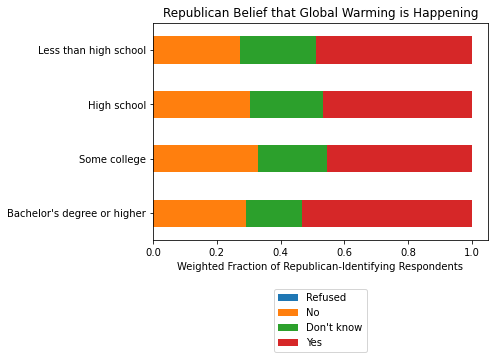

In [15]:
plot_cat_crosstab(df[df["party"] == "Republican"],
                 "educ_category", "happening",
                 xlab="Weighted Fraction of Republican-Identifying Respondents",
                 ylab="",
                 title="Republican Belief that Global Warming is Happening")

worry,Refused,Not at all worried,Not very worried,Somewhat worried,Very worried
happening,,,,,
Refused,0.628332,0.099728,0.039163,0.187265,0.045512
No,0.002582,0.600047,0.331960,0.058976,0.006435
Don't know,0.004375,0.235452,0.454264,0.282587,0.023322
Yes,0.000913,0.049593,0.173425,0.506552,0.269516


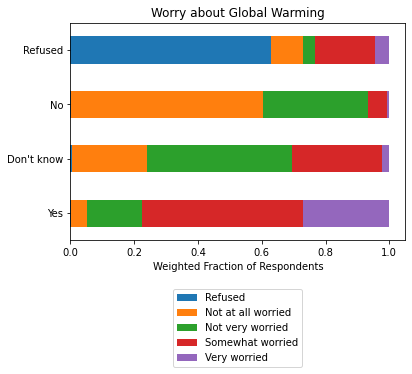

In [26]:
plot_cat_crosstab(df,
                 "happening", "worry",
                 xlab="Weighted Fraction of Respondents",
                 ylab="",
                 title="Worry about Global Warming")